## **EDA**

In [ ]:
import pandas as pd

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset
df = pd.read_csv('amazon_reviews.csv')

In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0


In [ ]:
# Keeping only the 'reviewText' column for analysis
df = df[['reviewText']]

In [ ]:
# Checking for missing values
print(df.isnull().sum())

reviewText    1
dtype: int64


In [ ]:
# Droping missing row
df = df.dropna(subset=['reviewText'])

In [ ]:
print(df.head())

                                          reviewText
0                                         No issues.
1  Purchased this for my device, it worked as adv...
2  it works as expected. I should have sprung for...
3  This think has worked out great.Had a diff. br...
4  Bought it with Retail Packaging, arrived legit...


## **Text preprocessing**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Downloading necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Initializing lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the words back into a single string
    return ' '.join(words)

In [ ]:
# Applying preprocessing to the 'reviewText' column
df['cleaned_text'] = df['reviewText'].apply(preprocess_text)

In [ ]:
# Displaying the cleaned text
print(df['cleaned_text'].head())

0                                                issue
1    purchased device worked advertised never much ...
2    work expected sprung higher capacity think mad...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: cleaned_text, dtype: object


**Label Creation (keyword-based sentiment classification)**

In [ ]:
# Sentiment labels based on keywords
def label_sentiment(text):
    positive_keywords = ['good', 'great', 'excellent', 'amazing', 'love', 'fantastic', 'awesome', 'no issue', 'no problem', 'works well','best','incredible','satisfied','happy']
    negative_keywords = ['bad', 'terrible', 'poor', 'hate', 'awful', 'disappointing', 'issue', 'problem','worst','not good','sucks']

    text = text.lower()

    if any(word in text for word in positive_keywords):
        return 1  # Positive sentiment
    elif any(word in text for word in negative_keywords):
        return 0  # Negative sentiment
    else:
        return 'neutral'  # Neutral sentiment

In [ ]:
# Applying the sentiment labeling function
df['sentiment'] = df['cleaned_text'].apply(label_sentiment)

In [ ]:
# Encoding sentiment as integers: 1 = Positive, 0 = Negative, 2 = Neutral
df['sentiment'] = df['sentiment'].map({
    'neutral': 2,
    1: 1,  # Positive
    0: 0   # Negative
})

In [ ]:
# Display the sentiment labels
print(df[['cleaned_text', 'sentiment']].head())

                                        cleaned_text  sentiment
0                                              issue          0
1  purchased device worked advertised never much ...          2
2  work expected sprung higher capacity think mad...          2
3  think worked greathad diff bran gb card went s...          1
4  bought retail packaging arrived legit orange e...          1


## **Handling Neutral Reviews**

In [ ]:
# Droping neutral reviews for binary classification
df = df[df['sentiment'] != 'neutral']

In [ ]:
# Display the sentiment distribution
print(df['sentiment'].value_counts())

sentiment
1    2521
2    1684
0     709
Name: count, dtype: int64


## **Feature Extraction (TF-IDF Vectorization)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initializing the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
# Transforming the cleaned text into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text'])

In [ ]:
# The target variable (sentiment labels)
y = df['sentiment']

## **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Initialize models
lr = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [ ]:
# Training and evaluating Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9023397761953205
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       134
           1       0.96      0.91      0.94       524
           2       0.82      0.98      0.90       325

    accuracy                           0.90       983
   macro avg       0.90      0.86      0.87       983
weighted avg       0.91      0.90      0.90       983



In [ ]:
print(df['sentiment'].unique())

[0 2 1]


In [ ]:
# SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8992878942014242
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       134
           1       0.98      0.89      0.94       524
           2       0.81      0.99      0.89       325

    accuracy                           0.90       983
   macro avg       0.89      0.86      0.87       983
weighted avg       0.91      0.90      0.90       983



In [ ]:
# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9440488301119023
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       134
           1       0.96      0.95      0.95       524
           2       0.91      0.95      0.93       325

    accuracy                           0.94       983
   macro avg       0.95      0.94      0.94       983
weighted avg       0.94      0.94      0.94       983



In [ ]:
# XGBoost
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9694811800610377
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       134
           1       1.00      0.95      0.98       524
           2       0.92      1.00      0.96       325

    accuracy                           0.97       983
   macro avg       0.97      0.97      0.97       983
weighted avg       0.97      0.97      0.97       983



In [ ]:
# LightGBM
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22650
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 679
[LightGBM] [Info] Start training from score -1.922279
[LightGBM] [Info] Start training from score -0.677248
[LightGBM] [Info] Start training from score -1.062145
LightGBM Accuracy: 0.9684638860630722
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       134
           1       1.00      0.95      0.97       524
           2       0.92      1.00      0.96       325

    accuracy                           0.97       983
   macro avg       0.97      0.97      0.97       983
weighted avg       0.97      0.97      0.97       983



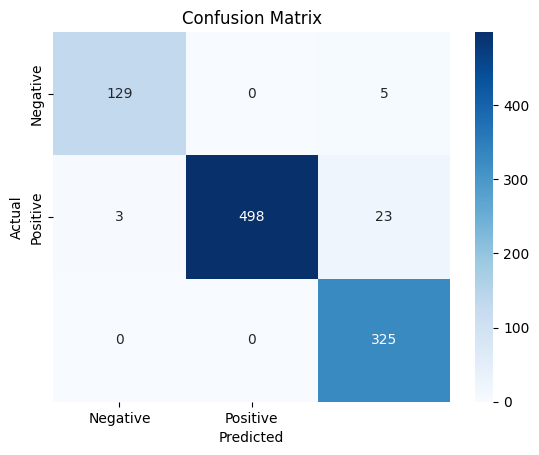

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for lightgbm
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## **Lightgbm model**

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from textblob import TextBlob

In [ ]:
# Filtering necessary column
reviews = df['reviewText']

In [ ]:
# Generate Sentiment Labels Based on Text
def get_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else 0  # 1 for positive, 0 for negative

In [ ]:
# Appling the get_sentiment function to the reviews
sentiments = reviews.apply(get_sentiment)

In [ ]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)

In [ ]:
# Feature Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
lgbm = lgb.LGBMClassifier()
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [20, 40, 60]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 3330, number of negative: 3330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.319838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138036
[LightGBM] [Info] Number of data points in the train set: 6660, number of used features: 3675
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [20, 40, 60],
                         'num_leaves': [31, 50, 70]},
             scoring='accuracy', verbose=1)

In [ ]:
# Geting the best estimator
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 60, 'num_leaves': 70}


In [ ]:
# Predictions with the Best Model
y_pred_lgbm = best_model.predict(X_test_tfidf)

In [ ]:
# Evaluating the Model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.8972533062054934
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       151
           1       0.92      0.96      0.94       832

    accuracy                           0.90       983
   macro avg       0.82      0.76      0.78       983
weighted avg       0.89      0.90      0.89       983



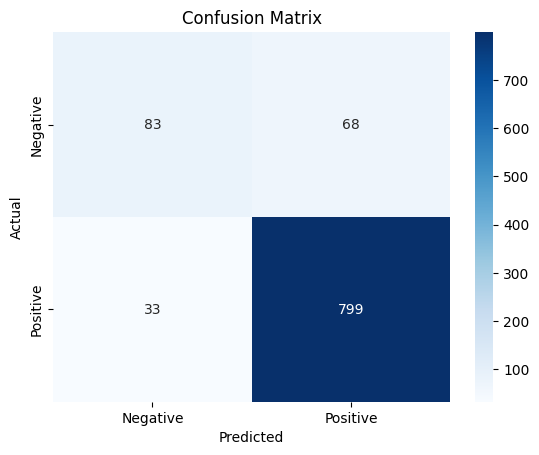

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

In [ ]:
# Saving the Model and Vectorizer
with open('lightgbm_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)